# Simple example of the evolutionary optimization framework

This notebook provides a simple example for the use of the evolutionary optimization framework builtin to the library. Under the hood, the implementation of the evolutionary algorithm is powered by `deap` and `pypet` cares about the parallelization and storage of the simulation data for us. 

Here we demonstrate how to fit parameters of a the evaluation function `optimize_me` which simply computes the distance of the parameters to the unit circle and returns this as the `fitness_tuple` that DEAP expects.

In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [ ]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np
import logging

from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.evolution import Evolution

import neurolib.optimize.evolution.evolutionaryUtils as eu
import neurolib.utils.functions as func

def optimize_me(traj):
    ind = evolution.getIndividualFromTraj(traj)
    logging.info("Hello, I am {}".format(ind.id))
    logging.info("You can also call me {}, or simply ({:.2}, {:.2}).".format(ind.params, ind.x, ind.y))
    
    # let's make a circle
    computation_result = abs((ind.x**2 + ind.y**2) - 1)
    # DEAP wants a tuple as fitness, ALWAYS!
    fitness_tuple = (computation_result ,)
    
    # we also require a dictionary with at least a single result for storing the results in the hdf
    result_dict = {}
    
    return fitness_tuple, result_dict

    
pars = ParameterSpace(['x', 'y'], [[-5.0, 5.0], [-5.0, 5.0]])
evolution = Evolution(optimize_me, pars, weightList = [-1.0],
                      POP_INIT_SIZE=4, POP_SIZE = 4, NGEN=4)
# info: chose POP_INIT_SIZE=100, POP_SIZE = 50, NGEN=10 for real exploration, 
# values here are low for testing: POP_INIT_SIZE=10, POP_SIZE = 6, NGEN=4

evolution.run(verbose = True)

In [ ]:
evolution.loadResults()

Parameters dictribution (Generation 9):
x: 	 mean: -0.4082,	 std: 0.4228
y: 	 mean: 0.3399,	 std: 0.5436
There are 10 valid individuals
Mean score across population: -0.27


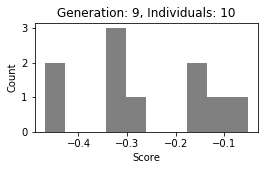

<Figure size 432x288 with 0 Axes>

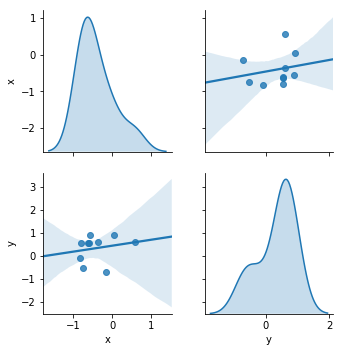

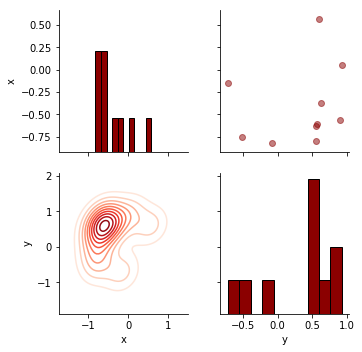

--------------------------
Best 20 individuals:
Printing 10 individuals
Individual 0 pars x -0.8011, y 0.5531
	Fitness values:  0.0522
Individual 1 pars x -0.5645, y 0.8948
	Fitness values:  0.1193
Individual 2 pars x 0.05222, y 0.926
	Fitness values:  0.1399
Individual 3 pars x -0.7534, y -0.5158
	Fitness values:  0.1664
Individual 4 pars x -0.6308, y 0.5492
	Fitness values:  0.3005
Individual 5 pars x -0.8224, y -0.07395
	Fitness values:  0.3182
Individual 6 pars x 0.5675, y 0.5974
	Fitness values:  0.321
Individual 7 pars x -0.602, y 0.561
	Fitness values:  0.3228
Individual 8 pars x -0.151, y -0.716
	Fitness values:  0.4646
Individual 9 pars x -0.3767, y 0.6234
	Fitness values:  0.4694


In [6]:
evolution.info(plot=True)

Text(0, 0.5, 'Score')

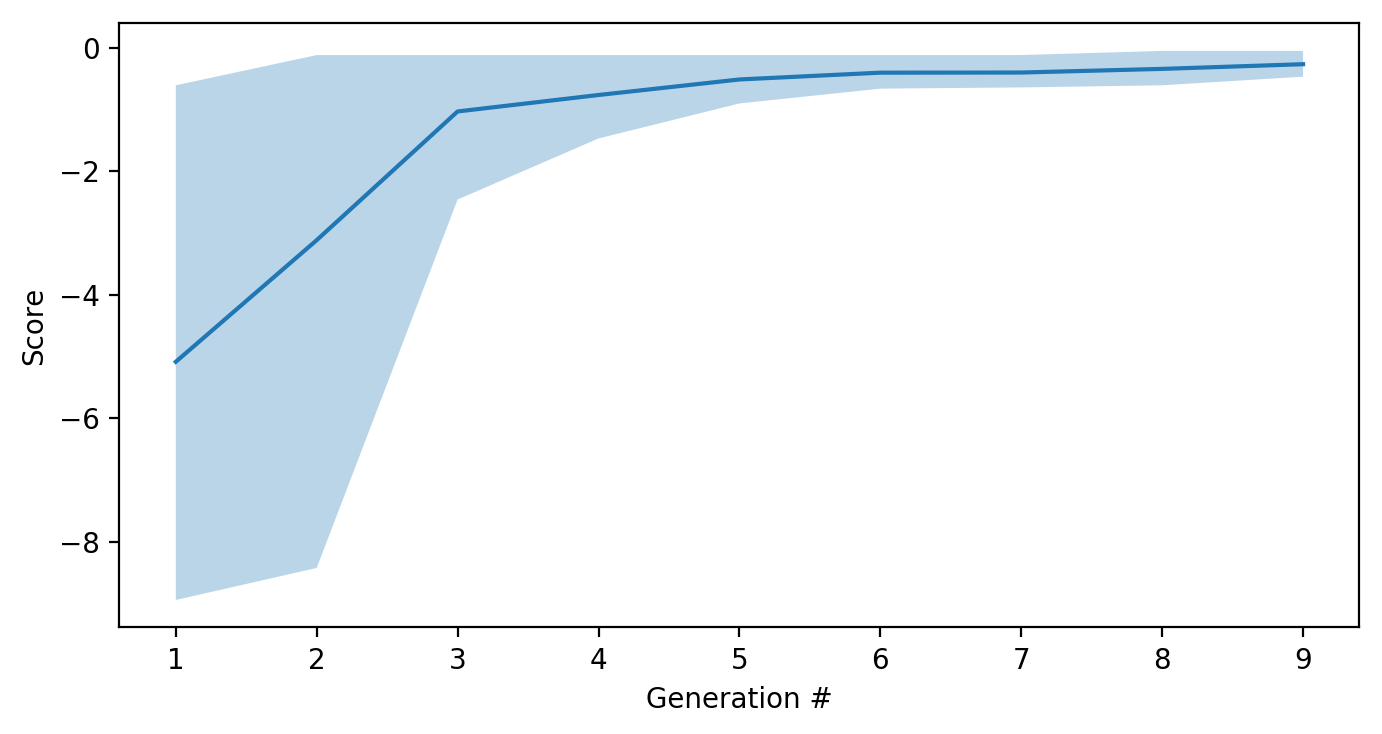

In [7]:
gens, all_scores = evolution.getScoresDuringEvolution(reverse=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=200)   
plt.plot(gens, np.nanmean(all_scores, axis=1))
plt.fill_between(gens, np.nanmin(all_scores, axis=1), np.nanmax(all_scores, axis=1), alpha=0.3)
plt.xlabel("Generation #")
plt.ylabel("Score")